<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
#%load_ext watermark
#%watermark

#%load_ext autoreload
#%autoreload 2

#import standard libs
from IPython.display import display
#from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json


In [2]:
#os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# get project dir
pp = PurePath(Path.cwd()).parts[:-1]
pdir = PurePath(*pp)
script_dir = pdir / 'src' 
viz_dir = pdir / 'report' / 'figures'
data_dir = pdir / 'data'
script_dirs = list(Path(script_dir).glob('./*/'))
for sdir in script_dirs: sys.path.append(sdir.as_posix())

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
import pymc3 as pm
#from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from utils import cprint
from bars import get_imbalance

RANDOM_STATE = 777

print()
#%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

/Users/Dacia/tensorflow/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/Dacia/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [15]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df
    
infp = PurePath(data_dir/'raw'/'IVE_tickbidask.txt')
print(infp)
df = read_kibot_ticks(infp)
cprint(df)

/Users/Dacia/Documents/02.Ale/py-projects/Adv_Fin_ML_Exercises/data/raw/IVE_tickbidask.txt
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2018-09-04 15:59:55  115.93  115.92  115.93   803   803   93091.79
2018-09-04 15:59:56  115.92  115.91  115.92   155   155   17967.60
2018-09-04 16:00:00  115.92  115.91  115.92  8570  8570  993434.40
2018-09-04 16:10:00  115.92  114.46  117.06     0     0       0.00
2018-09-04 18:30:00  115.92  115.35  116.57     0     0       0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399601 entries, 2009-09-28 09:30:00 to 2018-09-04 18:30:00
Data columns (total 6 columns):
price    1399601 non-null float64
bid      1399601 non-null fl

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [18]:
outfp = PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df.to_parquet(outfp)

In [30]:
infp=PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2018-09-04 15:59:55  115.93  115.92  115.93   803   803   93091.79
2018-09-04 15:59:56  115.92  115.91  115.92   155   155   17967.60
2018-09-04 16:00:00  115.92  115.91  115.92  8570  8570  993434.40
2018-09-04 16:10:00  115.92  114.46  117.06     0     0       0.00
2018-09-04 18:30:00  115.92  115.35  116.57     0     0       0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399601 entries, 2009-09-28 09:30:00 to 2018-09-04 18:30:00
Data columns (total 6 columns):
price    1399601 non-null float64
bid      1399601 non-null float64
ask      1399601 non-null float64
size     1399601 non-null int64
v        1399601 no

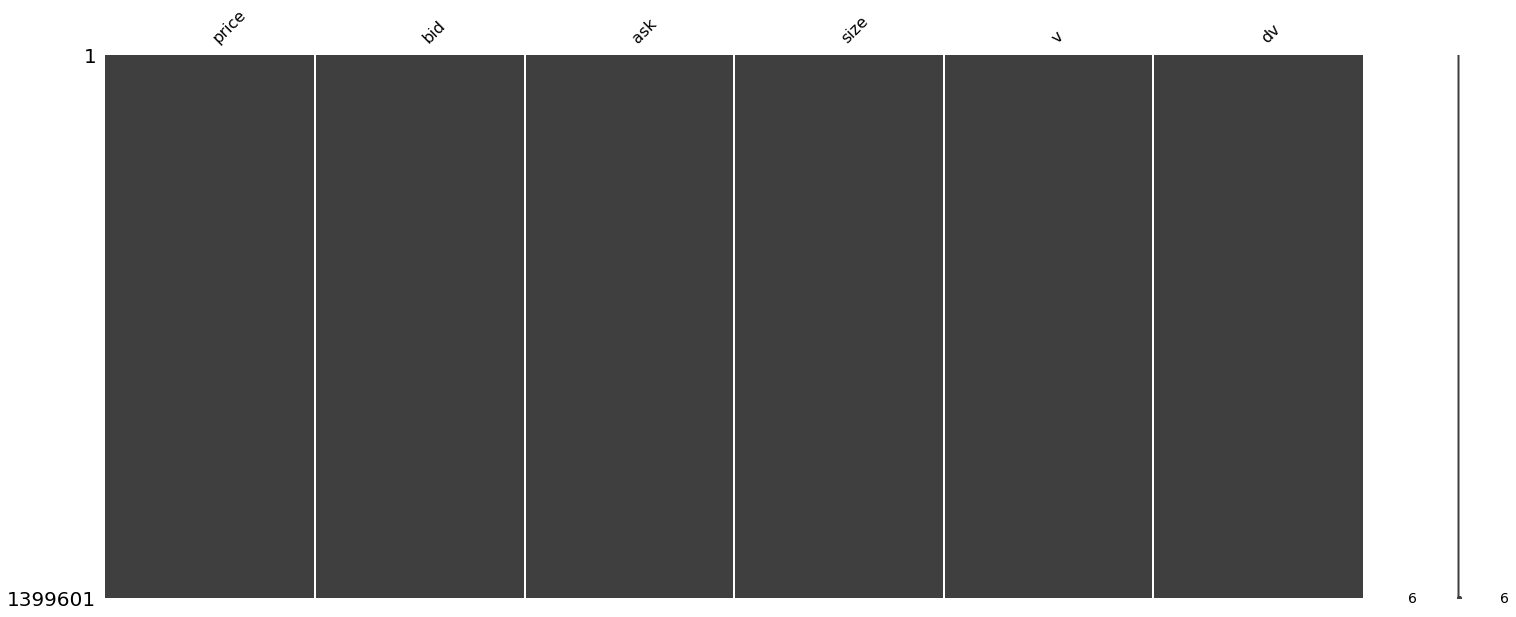

In [20]:
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

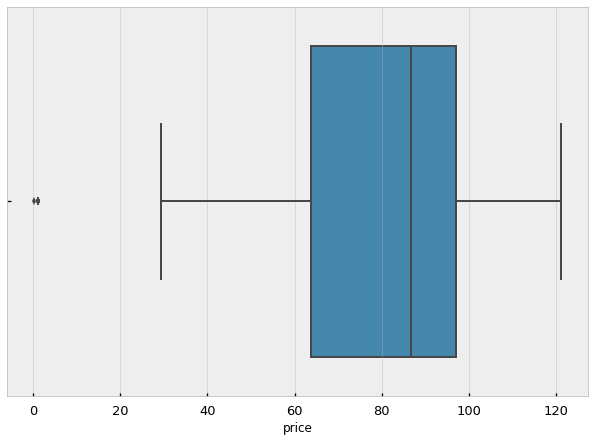

In [21]:
sns.boxplot(df.price)

In [22]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [31]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [32]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


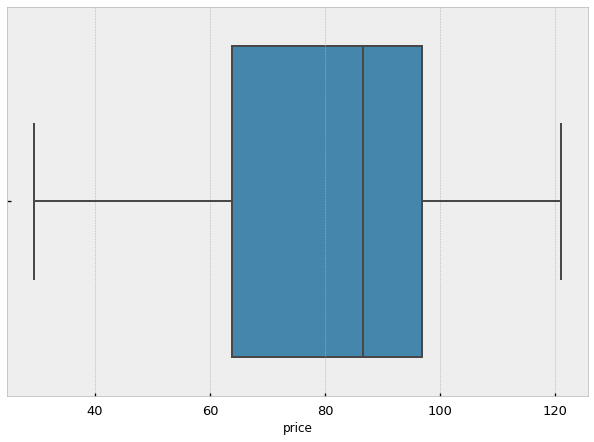

In [33]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [34]:
df = df.loc[~mad]
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2018-09-04 15:59:55  115.93  115.92  115.93   803   803   93091.79
2018-09-04 15:59:56  115.92  115.91  115.92   155   155   17967.60
2018-09-04 16:00:00  115.92  115.91  115.92  8570  8570  993434.40
2018-09-04 16:10:00  115.92  114.46  117.06     0     0       0.00
2018-09-04 18:30:00  115.92  115.35  116.57     0     0       0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399590 entries, 2009-09-28 09:30:00 to 2018-09-04 18:30:00
Data columns (total 6 columns):
price    1399590 non-null float64
bid      1399590 non-null float64
ask      1399590 non-null float64
size     1399590 non-null int64
v        1399590 no

In [35]:
outfp = PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

In [3]:
infp=PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2018-09-04 15:59:55  115.93  115.92  115.93   803   803   93091.79
2018-09-04 15:59:56  115.92  115.91  115.92   155   155   17967.60
2018-09-04 16:00:00  115.92  115.91  115.92  8570  8570  993434.40
2018-09-04 16:10:00  115.92  114.46  117.06     0     0       0.00
2018-09-04 18:30:00  115.92  115.35  116.57     0     0       0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399590 entries, 2009-09-28 09:30:00 to 2018-09-04 18:30:00
Data columns (total 6 columns):
price    1399590 non-null float64
bid      1399590 non-null float64
ask      1399590 non-null float64
size     1399590 non-null int64
v        1399590 no

# Tick Bars

In [4]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [5]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,399,590
volume ratio: 548.0
dollar ratio: 46344.0


In [13]:
tick_M = 200 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

  7%|▋         | 96935/1399590 [00:00<00:01, 968766.56it/s]

tick threshold: 200


100%|██████████| 1399590/1399590 [00:00<00:00, 1845883.94it/s]


[199, 399, 599, 799, 999, 1199, 1399, 1599, 1799, 1999]

In [14]:
df.iloc[tidx].shape, df.shape

((6997, 6), (1399590, 6))

Dataset is large so select smaller example for quick exploration

In [15]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|██████████| 1399590/1399590 [00:00<00:00, 1885954.81it/s]


(6997, 6)

In [16]:
cprint(tick_df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask  size    v          dv
dates                                                               
2018-08-31 13:21:53  115.7874  115.78  115.79   181  181  20957.5194
2018-08-31 15:43:35  116.0100  116.03  116.04   100  100  11601.0000
2018-09-04 10:14:07  115.9500  115.94  115.95   178  178  20639.1000
2018-09-04 12:23:17  115.5800  115.57  115.58   300  300  34674.0000
2018-09-04 14:25:59  115.9199  115.91  115.92   112  112  12983.0288
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6997 entries, 2009-09-28 10:02:52 to 2018-09-04 14:25:59
Data columns (total 6 columns):
price    6997 non-null float64
bid      6997 non-null float64
ask      6997 non-null float64
size     6997 non-null int64
v        6997 non-nu

In [19]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (8,))

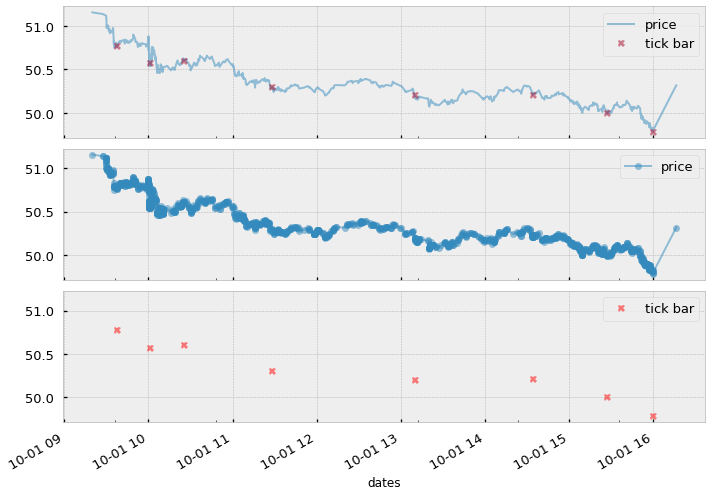

In [18]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [20]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [21]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
tick_bars_ohlc = get_ohlc(ref, sub)
cprint(tick_bars_ohlc)

outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
tick_bars_ohlc.to_parquet(outfp)

100%|██████████| 6996/6996 [00:02<00:00, 2356.03it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                     end               start      open      high       low  \
6991 2018-08-31 13:21:53 2018-08-31 11:22:21  115.8900  115.9462  115.5800   
6992 2018-08-31 15:43:35 2018-08-31 13:21:53  115.7874  116.0749  115.6943   
6993 2018-09-04 10:14:07 2018-08-31 15:43:35  116.0100  116.1500  115.5800   
6994 2018-09-04 12:23:17 2018-09-04 10:14:07  115.9500  116.1000  115.5600   
6995 2018-09-04 14:25:59 2018-09-04 12:23:17  115.5800  115.9325  115.5500   

         close  
6991  115.7874  
6992  116.0100  
6993  115.9500  
6994  115.5800  
6995  115.9199  
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 6 columns):
end      6996 non-null datetime64[ns]
start    6996 non-null datetime64[ns]
open     6996 

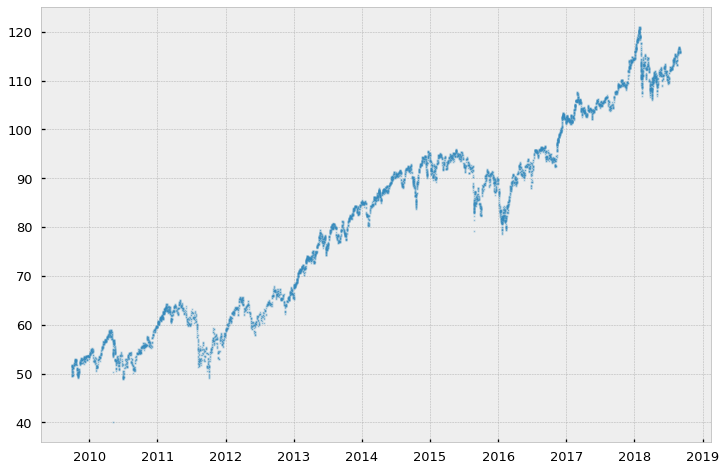

In [34]:
plt.figure(figsize=(12, 8))
#plt.plot(df.price, ls='-')
plt.plot(tick_df.price, ls='', marker='X', markersize=2, alpha=0.5)
plt.show()

# Volume Bars

In [35]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [36]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', volume_M)
cprint(v_bar_df)

  7%|▋         | 104626/1399590 [00:00<00:01, 1045316.44it/s]

volume threshold: 10,000


100%|██████████| 1399590/1399590 [00:00<00:00, 1746488.00it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask  size     v           dv
dates                                                                 
2018-09-04 15:38:08  115.8200  115.82  115.83  1800  1800  208476.0000
2018-09-04 15:45:10  115.7347  115.73  115.74   262   262   30322.4914
2018-09-04 15:54:00  115.7400  115.73  115.74  1000  1000  115740.0000
2018-09-04 15:57:42  115.8253  115.82  115.83   457   457   52932.1621
2018-09-04 16:00:00  115.9200  115.91  115.92  8570  8570  993434.4000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59593 entries, 2009-09-28 09:44:09 to 2018-09-04 16:00:00
Data columns (total 6 columns):
price    59593 non-null float64
bid      59593 non-null float64
ask      59593 non-null float64
size     59593 non-null int64
v

xdf shape: (1466,), xtdf shape: (48,)


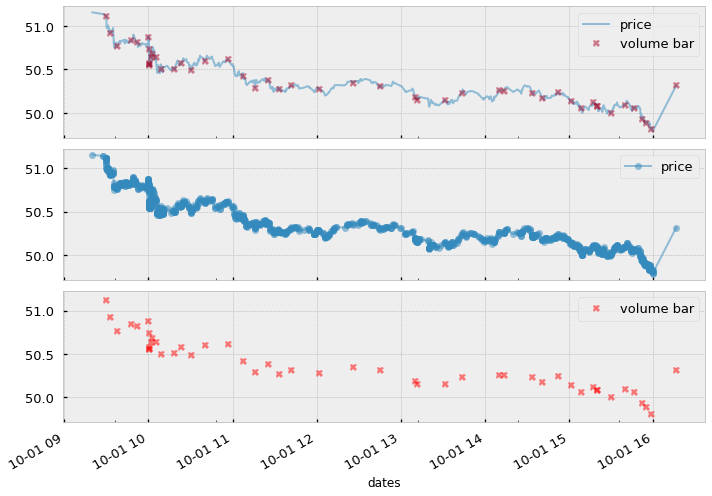

In [37]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [38]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [39]:
dollar_M = 1_000_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', dollar_M)
cprint(dv_bar_df)

 16%|█▌        | 217918/1399590 [00:00<00:01, 1089453.37it/s]

dollar threshold: 1,000,000


100%|██████████| 1399590/1399590 [00:00<00:00, 1766933.44it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2018-09-04 15:38:08  115.82  115.82  115.83  1800  1800  208476.00
2018-09-04 15:45:02  115.74  115.74  115.75  1200  1200  138888.00
2018-09-04 15:53:10  115.73  115.72  115.73  1183  1183  136908.59
2018-09-04 15:56:06  115.77  115.77  115.78  1100  1100  127347.00
2018-09-04 16:00:00  115.92  115.91  115.92  8570  8570  993434.40
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49994 entries, 2009-09-28 09:46:35 to 2018-09-04 16:00:00
Data columns (total 6 columns):
price    49994 non-null float64
bid      49994 non-null float64
ask      49994 non-null float64
size     49994 non-null int64
v        49994 non-null int64

In [ ]:
df0 = df.copy()
print(df0.head())
idx = df0.resample('1S', convention='end')
df0 = df0.iloc[idx]
df0 = df0[~df0.index.duplicated(keep='last')]
outfp = PurePath(data_dir/'processed'/'IVE_dollarValue_resampled_1s.parquet')
df0.to_parquet(outfp)

                     price    bid    ask  size    v        dv
dates                                                        
2009-09-28 09:30:00  50.79  50.70  50.79   100  100   5079.00
2009-09-28 09:30:00  50.71  50.70  50.79   638  638  32352.98
2009-09-28 09:31:32  50.75  50.75  50.76   100  100   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75   100  100   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76   300  300  15225.00


xdf shape: (1466,), xtdf shape: (26,)


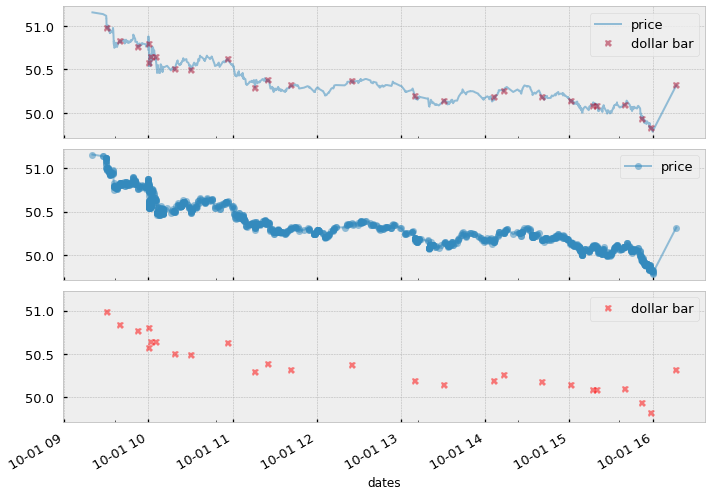

In [40]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [41]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.TimeGrouper('1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [42]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))
dfc = scale(count_bars(df))

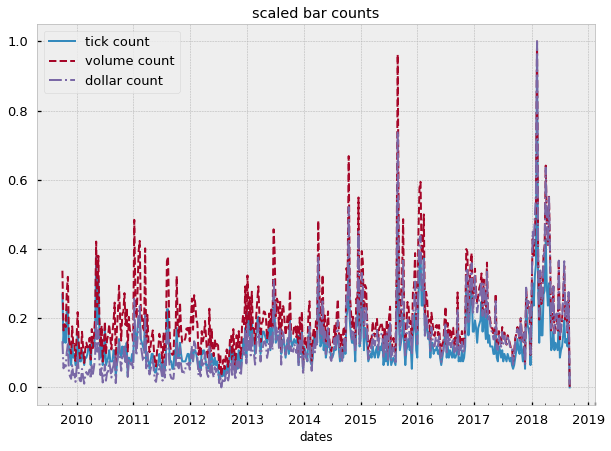

In [43]:
# plot time series of count

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [44]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar','df']
bar_std = [tc.std(),vc.std(),dc.std(),dfc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 7.88%, vc std: 11.21%, dc std: 10.97%


tick      0.078805
df        0.079178
dollar    0.109741
volume    0.112131
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [45]:
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [46]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)
df_ret = returns(df.price)   

bar_returns = [tr, vr, dr, df_ret]

In [47]:
bar_types = ['tick','volume','dollar']
bar_autocorr = [tc.autocorr(),vc.autocorr(),dc.autocorr()]
autocorrs = (pd.Series(bar_autocorr,index=bar_types))
autocorrs.sort_values()

tick      0.509998
volume    0.523966
dollar    0.687846
dtype: float64

In [48]:
def get_test_stats(bar_types,bar_returns,test_func,*args,**kwds):
    
    dct = {bar:(int(bar_ret.shape[0]), test_func(bar_ret,*args,**kwds)) 
           for bar,bar_ret in zip(bar_types,bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0:'sample_size',1:f'{test_func.__name__}_stat'})
          .T)
    return df

autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
tick,6996.0,-0.132544
dollar,49993.0,-0.123281
volume,59592.0,-0.017465


,sample_size,autocorr_stat
volume,59592.0,0.017465
dollar,49993.0,0.123281
tick,6996.0,0.132544


In [49]:
def plot_autocorr(bar_types,bar_returns):
    f,axes=plt.subplots(len(bar_types),figsize=(10,7), sharey=True)

    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(bar, lags=120, ax=axes[i],
                                 alpha=0.05, unbiased=True, fft=True,
                                 zero=False,
                                 title=f'{typ} AutoCorr')
    plt.tight_layout()   
    
def plot_hist(bar_types,bar_rets):
    f,axes=plt.subplots(len(bar_types),figsize=(10,6))
    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar, ax=axes[i], kde=False, label=typ)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()     

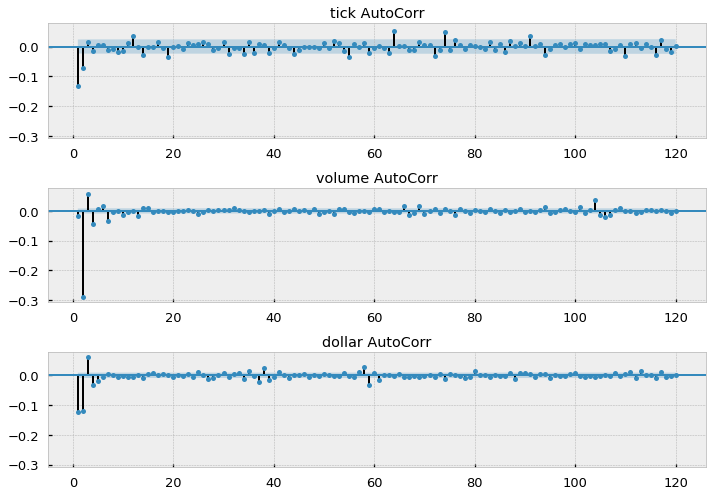

In [50]:
 plot_autocorr(bar_types,bar_returns)

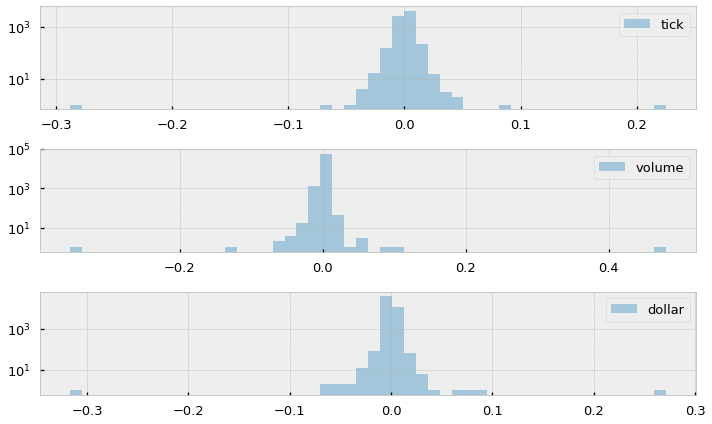

In [51]:
plot_hist(bar_types,bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [62]:
def partition_monthly(s):
    return s.resample('1M').var()

In [63]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [64]:
get_test_stats(bar_types,monthly_vars,np.var).sort_values('var_stat')

,sample_size,var_stat
dollar,109.0,2.117809e-09
volume,109.0,2.734486e-09
tick,109.0,1.841202e-08


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?

In [65]:
def jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')

,sample_size,jb_stat
tick,6996.0,1.074522e+08
dollar,49993.0,5.187503e+10
volume,59592.0,3.179925e+11


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [66]:
def shapiro(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]

(get_test_stats(bar_types,bar_returns,shapiro)
 .sort_values('shapiro_stat')[::-1])

,sample_size,shapiro_stat
tick,6996.0,0.591879
dollar,49993.0,0.406727
volume,59592.0,0.282808


# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

### Update [05.04.18]

Earlier version was missing some additional code. Before we can compare we must compute the Dollar Imbalance Bar. This is my initial implementation of this concept but is experimental and may need some adjustments. 

   1. Compute the sequence ${bt}_{t=1,...,T}$.
   2. Compute the imbalance at time $T$ defined as $\theta_T = \sum_{t=1}^{T}b_tv_t$.
   3. Compute the expected value of $T$ as ewma of previous $T$ values.
   4. Compute the expected value of $\theta_T$ as ewma of $b_tv_t$ values.
   5. for each index:
        - compute $\lvert\theta_t\rvert >= E_0[T] * \lvert2v^+-E_0[v_t]\rvert$
        - if the condition is met capture the quantity of ticks
        - reset tick count
        - continue


In [68]:
tidx = get_imbalance(df.price.values)*df.dv.iloc[1:]
cprint(tidx)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                            dv
dates                         
2018-09-04 15:59:55   93091.79
2018-09-04 15:59:56  -17967.60
2018-09-04 16:00:00 -993434.40
2018-09-04 16:10:00      -0.00
2018-09-04 18:30:00      -0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399589 entries, 2009-09-28 09:30:00 to 2018-09-04 18:30:00
Data columns (total 1 columns):
dv    1399589 non-null float64
dtypes: float64(1)
memory usage: 21.4 MB
None
-------------------------------------------------------------------------------



In [69]:
wndo = tidx.shape[0]//1000
print(f'window size: {wndo:,.2f}')

## Expected value of bs approximated by ewm
E_bs = tidx.ewm(wndo).mean() # expected `bs`

## what is E_T??? 
## in this implementation E_T is ewm of index values
E_T = pd.Series(range(tidx.shape[0]), index=tidx.index).ewm(wndo).mean()

df0 =(pd.DataFrame().assign(bs=tidx)
      .assign(E_T=E_T).assign(E_bs=E_bs)
      .assign(absMul=lambda df: df.E_T*np.abs(df.E_bs))
      .assign(absTheta=tidx.cumsum().abs()))
cprint(df0)

window size: 1,399.00
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                            bs        E_T         E_bs        absMul  \
dates                                                                  
2018-09-04 15:59:55   93091.79  1398185.0 -4119.017078  5.759148e+09   
2018-09-04 15:59:56  -17967.60  1398186.0 -4128.908923  5.772983e+09   
2018-09-04 16:00:00 -993434.40  1398187.0 -4835.555702  6.761011e+09   
2018-09-04 16:10:00      -0.00  1398188.0 -4832.101734  6.756187e+09   
2018-09-04 18:30:00      -0.00  1398189.0 -4828.650233  6.751366e+09   

                         absTheta  
dates                              
2018-09-04 15:59:55  1.332319e+09  
2018-09-04 15:59:56  1.332337e+09  
2018-09-04 16:00:00  1.333330e+09  
2018-09-04 16:10:00  1.333330e+09  
2018-09-04 18:30:00  1.333330e+09  
---------------------------------------

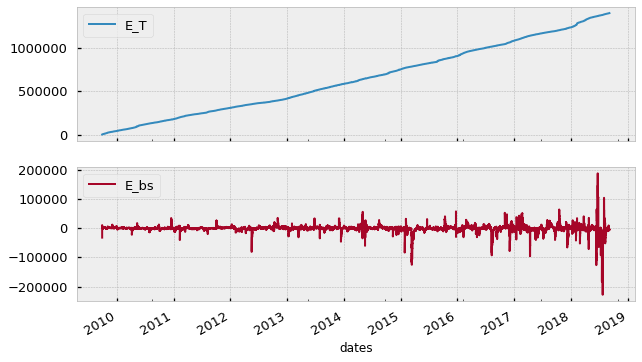

In [70]:
df0[['E_T','E_bs']].plot(subplots=True, figsize=(10,6));

In [60]:
display(df0.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,1399.589000,1399.589000,1399.589000,1.399589e+03,1.399589e+03
mean,-0.952658,698.397301,-0.944180,5.428530e+06,3.125834e+05
std,679.205444,404.022715,13.082606,1.430588e+07,3.001020e+05
min,-244194.944400,0.000000,-228.156817,0.000000e+00,3.537070e-01
25%,-19.250490,348.498000,-2.812954,4.393225e+05,4.724095e+04
50%,-4.936000,698.395000,-0.113818,1.611854e+06,1.264416e+05
75%,19.095450,1048.292000,2.597435,4.746755e+06,5.828937e+05
max,289491.800000,1398.189000,187.774821,3.142347e+08,1.401899e+06


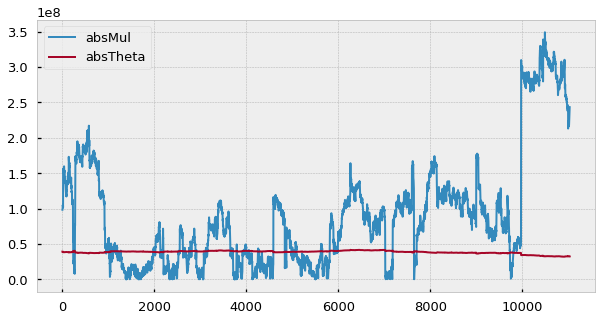

In [61]:
(df0.loc['2010-06',['absMul','absTheta']]
 .reset_index(drop=True)
 .plot(figsize=(10,5)))

In [82]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in tqdm(df.itertuples()):
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [83]:
bars = agg_imbalance_bars(df0)
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts'])
                 .drop_duplicates())
cprint(test_imb_bars)

1399589it [05:04, 4593.21it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      start                stop  Ts
1399558 2018-09-04 15:59:49 2018-09-04 15:59:55   2
1399559 2018-09-04 15:59:55 2018-09-04 15:59:56   2
1399560 2018-09-04 15:59:56 2018-09-04 16:00:00   2
1399561 2018-09-04 16:00:00 2018-09-04 16:10:00   2
1399562 2018-09-04 16:10:00 2018-09-04 18:30:00   2
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195336 entries, 0 to 1399562
Data columns (total 3 columns):
start    1195336 non-null datetime64[ns]
stop     1195336 non-null datetime64[ns]
Ts       1195336 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 36.5 MB
None
-------------------------------------------------------------------------------



In [84]:
test_imb_bars.Ts.describe().round()

count    1195336.0
mean           3.0
std            2.0
min            1.0
25%            2.0
50%            2.0
75%            3.0
max          139.0
Name: Ts, dtype: float64

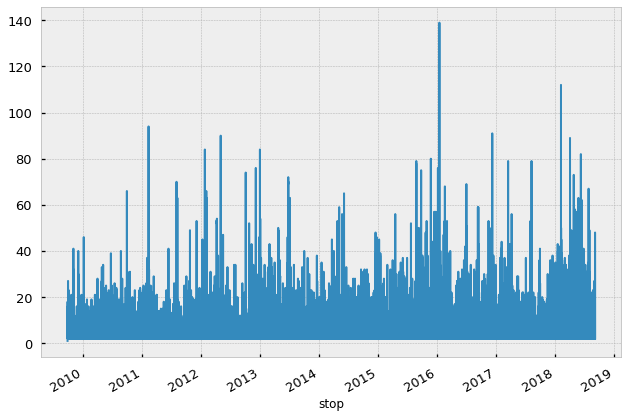

In [85]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [86]:
dvImbBars = df.price.loc[test_imb_bars.stop].drop_duplicates()
cprint(dvImbBars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2018-09-04 15:37:28  115.8068
2018-09-04 15:37:41  115.8153
2018-09-04 15:51:20  115.7296
2018-09-04 15:57:06  115.8181
2018-09-04 15:57:42  115.8253
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261673 entries, 2009-09-28 09:30:00 to 2018-09-04 15:57:42
Data columns (total 1 columns):
price    261673 non-null float64
dtypes: float64(1)
memory usage: 4.0 MB
None
-------------------------------------------------------------------------------



In [87]:
dvBar = dv_bar_df.price
cprint(dvBar)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price
dates                      
2018-09-04 15:38:08  115.82
2018-09-04 15:45:02  115.74
2018-09-04 15:53:10  115.73
2018-09-04 15:56:06  115.77
2018-09-04 16:00:00  115.92
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49994 entries, 2009-09-28 09:46:35 to 2018-09-04 16:00:00
Data columns (total 1 columns):
price    49994 non-null float64
dtypes: float64(1)
memory usage: 2.0 MB
None
-------------------------------------------------------------------------------



In [88]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImbBars)

In [89]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

get_test_stats(bar_types,bar_rets,pd.Series.autocorr)

,sample_size,autocorr_stat
dvBar,49993.0,-0.123281
dvImb,261672.0,-0.075622


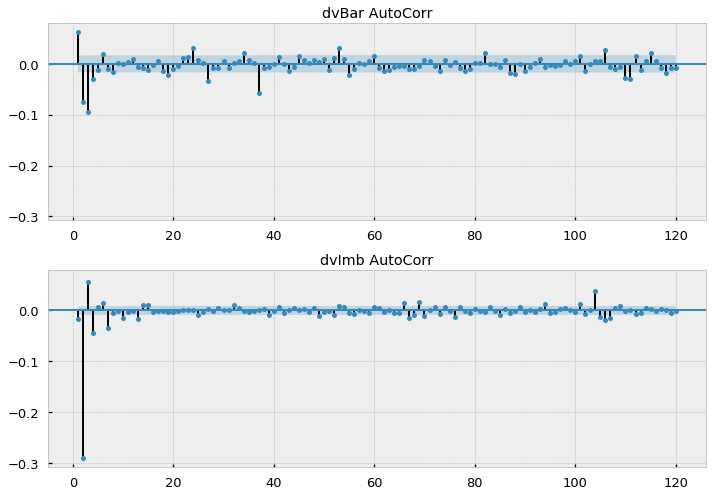

In [90]:
plot_autocorr(bar_types,bar_returns)

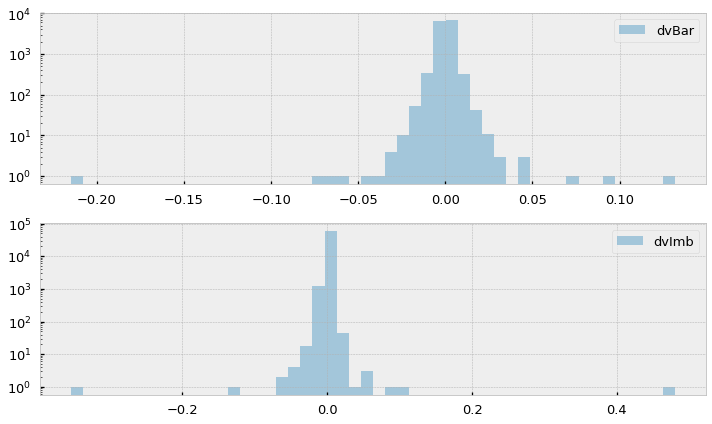

In [91]:
plot_hist(bar_types,bar_returns)

In [92]:
jbs = get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')
shaps = (get_test_stats(bar_types,bar_returns,shapiro)
         .sort_values('shapiro_stat')[::-1])

display(jbs,shaps)

,sample_size,jb_stat
dvBar,13994.0,1.265705e+08
dvImb,59592.0,3.179925e+11


,sample_size,shapiro_stat
dvBar,13994.0,0.655805
dvImb,59592.0,0.282808


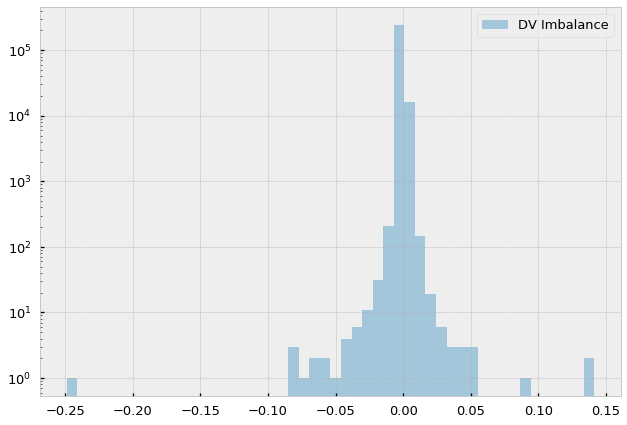

In [96]:
f, ax = plt.subplots()
ax.set(yscale='log')
sns.distplot(drImb[np.isfinite(drImb)].dropna(),
             ax=ax, kde=False, label='DV Imbalance')
ax.legend()